<a href="https://colab.research.google.com/github/Sav-eng/notebooks/blob/master/Com_Eng_Math_2_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear optimization example

Ex. A small startup hardware company is selling smart gadgets. This company has two main products which are smartwatches, and smart TVs sold for 1,200 and 5,000 THB, respectively. The company decides that they will buy a 3D printer to manufacture their products instead of using Chinese factories. After some testing, a printer could produce a maximum of 50 watches or 10 TVs per day. Due to the issues with logistics a total 55 items could be produced per day. For the maintenance issue, at least 3 TVs have to be produced per day. Assuming that the demand for both items is unlimited, the company asks you how many watches and TVs should they produce per single printer to maximize revenue.

To solve this problem, first, we have to formulate this problem as a mathematical program.

To model the program we should :

1. Identifying the decision variable.
2. Identifying the objective. 
3. Identifying the constraints.

A mathematical program for this example is :

####Decision variable

$x_1$ : The amount of smartwatches produced per day </br> $x_2$ : The amount of TVs produced per day

$$Objective : max( 1200x_1 + 5000x_2) $$
\begin{equation*}
s.t.
\begin{split}
  \frac{1}{50}x_1 + \frac{1}{10}x_2 & \leq 1 \\
  x_1 + x_2 & \leq 55 \\
  x_2 & \geq 3 \\
  x_1, x_2 & \geq 0 \\
\end{split}
\end{equation*}

After the linear program is modeled, we then convert the program into a  standard form. 

$$Objective : min( - 1200x_1 - 5000x_2) )$$
\begin{equation*}
s.t.
\begin{split}
  \frac{1}{50}x_1 + \frac{1}{10}x_2 + x_3 & = 1 \\
  x_1 + x_2 + x_4 & = 55 \\
  x_2 -x_5 & =  3 \\
  x_1, x_2, x_3, x_4, x_5 & \geq 0 \\
\end{split}
\end{equation*}


After the problem is converted into a standard form, we then convert it into a matrix form.

\begin{split}
  min \;\;\;  \mathbf{c}^T \mathbf{x} \\
  s.t. \; \mathbf{A}\mathbf{x} = \mathbf{b} \\
  \mathbf{x} \geq 0
\end{split}

$$
where \;\;
\begin{align}
  \mathbf{c} &= \begin{bmatrix}
          -1200 \\
          -5000 \\
          0 \\
          0 \\
          0 \\
        \end{bmatrix},
        \mathbf{A} = \begin{bmatrix}
          \frac{1}{50} & \frac{1}{10} & 1 & 0 & 0 \\
          1 & 1 & 0 & 1 & 0 \\
          0 & 1 & 0 & 0 & -1  \\
        \end{bmatrix},
        \mathbf{x} = \begin{bmatrix}
          x_{1} \\
          x_{2} \\
          x_{3} \\
          x_{4} \\
          x_{5} \\
        \end{bmatrix},
         \mathbf{b} = \begin{bmatrix}
          1 \\
          55 \\
          3 
        \end{bmatrix}
\end{align}
$$

After the matrix from is obtained, we then feed the matrixs into a linear optimization library to solve for an optimal solution and optimal value.

## Import library



In [ ]:
from scipy.optimize import linprog
import numpy as np

## Creating a matrix form of the problem




In [ ]:
c_T = np.array([-1200, -5000, 0, 0, 0])
A = np.array(
    [
     [1/50     , 1/10   , 1,  0,  0],
     [1          , 1        , 0, 1,  0],
     [0          , 1        , 0, 0, -1],
    ]
)
bound = [[0, None], [0, None], [0, None], [0, None], [0, None]] # bound for each variables (0, inf)
b = [1, 55, 3]

## Solving the optimization problem
It was found that x = [35, 3, 0, 17, 0], which means that we should produce 35 watches and 3 TVs per day.

In [ ]:
result = linprog(c = c_T, A_eq = A, b_eq=b, bounds=bound, method='simplex')
print("{}\n\n optimal value is {} \n optimal soultion is {}".format(result,result.fun, result.x)) # actual optimal value is 57000

     con: array([-2.22044605e-16,  0.00000000e+00, -8.88178420e-16])
     fun: -57000.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([35.,  3.,  0., 17.,  0.])

 optimal value is -57000.0 
 optimal soultion is [35.  3.  0. 17.  0.]


## Example of wrong matrix formation

Instead of producing at least 3 TVs. We mistype and produce at least 30 TVs instead. Thus, a feasible solution could not be found. 


In [ ]:
new_b = [1, 55, 15]
result = linprog(c = c_T, A_eq = A, b_eq = new_b, bounds=bound, method='simplex')
print(result)

     con: array([0., 0., 5.])
     fun: -50000.0
 message: "Phase 1 of the simplex method failed to find a feasible solution. The pseudo-objective function evaluates to 5.0e+00 which exceeds the required tolerance of 1e-09 for a solution to be considered 'close enough' to zero to be a basic solution. Consider increasing the tolerance to be greater than 5.0e+00. If this tolerance is unacceptably  large the problem may be infeasible."
     nit: 2
   slack: array([], dtype=float64)
  status: 2
 success: False
       x: array([ 0., 10.,  0., 45.,  0.])


If we remove the production constraint. The solution becomes unbounded.

In [ ]:
c_T = np.array([-1200, -5000,  0])
A = np.array(
    [
     [0, 1, -1]
    ]
)
bound = [[0, None], [0, None], [0, None],] # bound for each variables (0, inf)
b = [3]
result = linprog(c = c_T, A_eq = A, b_eq = b, bounds=bound, method='simplex')
print(result)

     con: array([nan])
     fun: -inf
 message: 'If feasible, the problem is (trivially) unbounded due  to a zero column in the constraint matrices. If you wish to check whether the problem is infeasible, turn presolve off.'
     nit: 0
   slack: array([], dtype=float64)
  status: 3
 success: False
       x: array([inf,  0.,  0.])


## Problem 1 : Skill Check

Solve the following program :
$$Objective : max(3x + 4y) $$
\begin{equation*}
s.t.
\begin{split}
  x + 2y & \leq 7 \\
  3x  - y & \geq 0 \\
  x -  y & \leq  2 \\
  x, y & \geq 0 \\
\end{split}
\end{equation*}



In [ ]:
pass 

## Problem 1.2 :

Solve problem 1 by using a graphical method and draw an isoprofit line. Does the obtained solution the same as the one we get in problem 1? You can solve this problem on your tablet/paper or use a plotting library. 

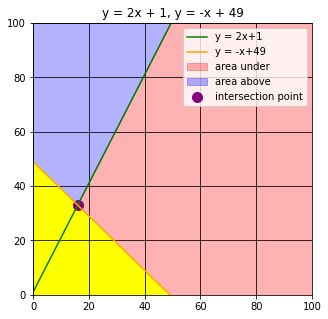

In [ ]:
# basic matplotlib command
import matplotlib.pyplot as plt
x = np.linspace(0, 1000, 100)
y = 2 * x + 1
y2 = -x +  49

min_y, max_y = -10000, 10000

plt.figure(figsize = (5, 5))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('y = 2x + 1, y = -x + 49')
plt.plot(x , y, color = 'green' , label = 'y = 2x+1')
plt.fill_between(x, y, min_y, color = 'red', alpha = 0.3, label = 'area under')
plt.fill_between(x, y, max_y, color = 'blue', alpha = 0.3, label = 'area above')

plt.plot(x , y2, color = 'orange', label = 'y = -x+49')
plt.fill_between(x, y2, min_y, color = 'yellow', alpha = 1)

plt.scatter(16, 33, s = 100, color = 'purple',  label = 'intersection point')
plt.legend()
plt.grid(color = 'black')

plt.show()

## Problem 2 : Hamtaro factory

After Hamtaro finished planting the sunflower field, he then aims to open the Hamtaro factory, selling sunflower snacks to the fellow hamsters. However, the harvested sunflower seeds have different grades, which leads to different nutrition values. Nutrition values for each grade are shown in the table below. To sell the snack at the market, the HFA (Hamster Food Administration) states that the snack they produce must contain at least 60% protein and less than 5% fat. To minimize the ingredient cost, how should Hamtaro mix the sunflower seeds to pass the HFA approval? Formulate the problem as a linear program and solve for an optimal solution.

|  sunflower seed grade | % protein| % fat |cost per g (THB) |
|:-----------------:|:------------:|:------------:|:------------:|
| terrible | 25 | 10 | 0.01 |
| low | 40  | 7 | 0.3 |
| medium | 70 | 4 | 0.7 |
| high | 90 | 1 | 1.2  |



In [ ]:
pass

## Problem 3 : Storage server management 

A company is running a video analytic system. To store the analyzed videos, the company has 10 local storage servers to store the data, of which each of them could store 24 TB per server. Recently, the company finds out that the servers  they have will not be adequate in the recent future. Therefore, the company has to figure out a plan to scale up its resource. The CTO has come up with two solutions, which are buying new storage servers, and using a cloud storage service called 'AWS S4-1'. The cloud storage service charges 690 THB/TB per month. On the other hand, buying a new server costs 40,000 THB, but it could be used for a very long time.  After several discussions, the company has projected the amount of storage required for each month. The projected data is shown in the table below. To minimize the cost, what should the company do to store the data? Formulate the problem as a linear program and solve for an optimal solution.

**Note 1 : The optimal solution does not have to be an integer.** </br>
**Note 2 : The company could buy new servers at any month.**

|  Month | 1  |  2 |  3 |  4 | 5 | 6 | 7 | 8 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Estimated amount of storage required (TB) | 140 | 200 | 300 | 1000 | 1400| 500 | 600 | 900 | 700 |



In [ ]:
pass

## Problem 3.2
From problem 3. Would the optimal solution change if the company has to pay 2,000 THB maintenance  fee for each local storage server they have?

In [ ]:
pass

## Problem 4 : Task assignment

A data center company has a lot of servers to be maintained. Thus, the maintainers are required 24/7. To maintain the servers, the company has employed four technicians, of which one of them is a senior. Each technician has to work at least 40 hours per week, except for the senior one, which works exactly 36 hours per week. The wage is paid hourly, and every technician has different wages and availability. The maintenance is performed with exactly one person on duty.  How should the company assign each person to be on duty to minimize the maintenance cost? Formulate the problem as a linear program and solve for an optimal solution.

<table>
  <tr>
    <td><b>Technician</td>
    <td><b>Wage per hour(weekday)</td>
    <td><b>Wage per hour(weekend)</td>
    <td colspan="7"><b>Maximum hours of avaiability</td>
  </tr>
  <tr>
    <td colspan="3"><b></td>
    <td><b>Mon.</td>
    <td><b>Tue.</td>
    <td><b>Wed.</td>
    <td><b>Thurs.</td>
    <td><b>Fri.</td>
    <td><b>Sat.</td>
    <td><b>Sun.</td>
  </tr>
  <tr>
    <td >Technician A</td>
    <td >70</td>
    <td >80</td>
    <td >12</td>
    <td >10</td>
    <td >12</td>
    <td >0</td>
    <td >8</td>
    <td >8</td>
    <td >4</td>
  </tr>
  <tr>
    <td >Technician B</td>
    <td >70</td>
    <td >80</td>
    <td >12</td>
    <td >10</td>
    <td >0</td>
    <td >8</td>
    <td >8</td>
    <td >4</td>
    <td >8</td>
  </tr>
  
  <tr>
    <td >Technician C</td>
    <td >80</td>
    <td >75</td>
    <td >0</td>
    <td >10</td>
    <td >8</td>
    <td >8</td>
    <td >0</td>
    <td >10</td>
    <td >10</td>
  </tr>
  
  <tr>
    <td >Senior technician D</td>
    <td >160</td>
    <td >200</td>
    <td >24</td>
    <td >0</td>
    <td >24</td>
    <td >24</td>
    <td >24</td>
    <td >24</td>
    <td >24</td>
  </tr>
  


</table>


In [ ]:
pass

## Problem 5 : Courier service

A company named "Curry" provides courier services to the customer. In town X, 10 customers are using this company's service. To satisfy the demand in this town, the company has placed the courier office as a hub for the couriers to collect customers' packages. However, only a limited amount of packages could be stockpiled in each office. The company has to pay the couriers 10 THB per distance they have traveled in kilometer. Moreover, the package could be partially collected (divisible), i.e., a courier from office A and C could collect 200 kg, 300 kg package from customer 1. How should this company plan to send the couriers to collect the package such that the package collection cost is minimized? The amount of packages to be collected for each customer is shown in Table 2.1. The size of each package storage is shown in Table 2.2. The distance from the courier office to each customer is shown in Table 2.3. Formulate the problem as a linear program and solve for an optimal solution.

**Note :  The optimal solution does not have to be an integer.**


Table 2.1. Amount of packages to be collected for each customer.

|  Customer | 1  |  2 |  3 |  4 | 5 | 6 | 7 | 8 | 9 | 10 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Amount of packages to be collected (kg) | 500 | 200 | 1000 | 2000 | 150 | 20 | 350 |250 | 375 | 1

Table 2.2. The size of package storage for each office.

|  Office | Storage size (kg)|
|:-----------------:|:------------:|
| A | 1500 | 
| B | 1000 | 
| C | 4000 | 

Table 2.3. Distance from the office to each household (km)

|  From / to | 1  |  2 |  3 |  4 | 5 | 6 | 7 | 8 | 9 | 10 | 
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| A | 4 | 3 | 8 | 1 | 2 | 1 | 3 | 2 | 4 | 4 |
| B | 3 | 1 | 1 | 8 | 3 | 4 | 5 | 7 | 9 | 8 | 
| C | 8 | 6 | 5 | 3 | 1 | 6 | 7 | 2 | 7 | 5 |




In [ ]:
pass

## Problem 6: VM placement

A startup company is provisioning virtual machines (VM) for cloud computing.  Currently, the company offers three types of instances, which are a small, medium, and large instance. The detail for each type of instance is shown in the table below. To host the VMs, the company has a large number of servers to provide its service. All of the servers they possessed have 8 CPUs core. Recently, the company has found a new customer to use their service. The customer want to host 20 small, 9 medium, and 5 large instances for their company. Moreover, the customer also demands that only they could access the provided server, i.e., the company could not use the leftover CPUs to serve other customers despite having 2 CPUs left. How many servers should the company allocate to serve this customer? Formulate the problem as a linear program and solve for an optimal solution.

|  Instance type |    Number of CPUs provided   |
|:-----------------:|:------------:|
| small | 2 CPUs |
| medium | 3 CPUs |
| large   | 4 CPUs |

**Note : The optimal solution does not have to be an integer.** </br>
**Hint : How many way could we fit the instances into a single server?**


In [ ]:
pass